In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from timeConversion import secondsToHuman
%matplotlib inline

In [2]:
data = pd.read_csv('../data/UW_Trip_Data_4mo_QC_capacity.csv')
broken = pd.read_csv('../data/4mo_broken_buses.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.to_datetime(data.ServiceDate, coerce=True)
data = data.set_index(data.ServiceDate)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  if __name__ == '__main__':


In [4]:
dates = data.ServiceDate.drop_duplicates()
dates = dates.apply(lambda x: '2' + x[1:])
dates.index = range(len(dates))
dates.sort()
data.ServiceDate = data.ServiceDate.apply(lambda x: '2' + x[1:])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [5]:
def AvTime(code):
    pickupTimes = data[(data.Activity == code) & (data.ETA < 86400)]
    avTime = dates.apply(lambda x: sum(pickupTimes[pickupTimes.ServiceDate == x].ETA)/float(len(pickupTimes[pickupTimes.ServiceDate == x])))
    avTime.index=dates
    avTime = avTime / 3600.0
    return avTime

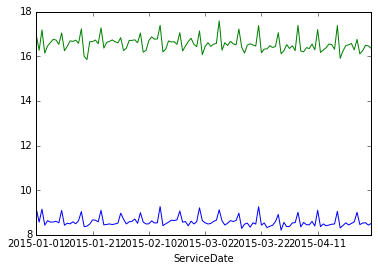

In [6]:
AvTime(4).plot()
AvTime(3).plot()

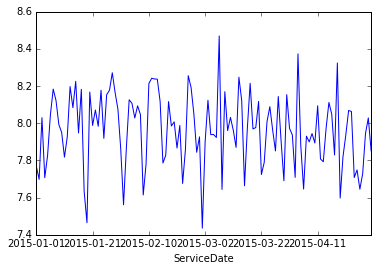

In [7]:
(AvTime(3)-AvTime(4)).plot()